## 6.1.8 MNISTデータセットによる更新手法の比較

===========iteration:0===========
SGD:2.3706377268858927
Momentum:2.4360752375132897
AdaGrad:2.368234640373415
Adam:2.2308604950240563
===========iteration:100===========
SGD:1.6911660832801472
Momentum:0.2814512692281814
AdaGrad:0.0938475468449713
Adam:0.26161504249428996
===========iteration:200===========
SGD:0.887073419182214
Momentum:0.23669182964604757
AdaGrad:0.09648033403318253
Adam:0.1919979812197318
===========iteration:300===========
SGD:0.5991294886188112
Momentum:0.2861115541374668
AdaGrad:0.10311335173973929
Adam:0.16179402362565914
===========iteration:400===========
SGD:0.5183244825392934
Momentum:0.22871473557538366
AdaGrad:0.09521709661262263
Adam:0.20917770391310403
===========iteration:500===========
SGD:0.4047066783548097
Momentum:0.19724438474111083
AdaGrad:0.11623476698224301
Adam:0.18959379150418723
===========iteration:600===========
SGD:0.48972569022903917
Momentum:0.20862747969429513
AdaGrad:0.09232340518469734
Adam:0.13752011033020373
===========iteration:70

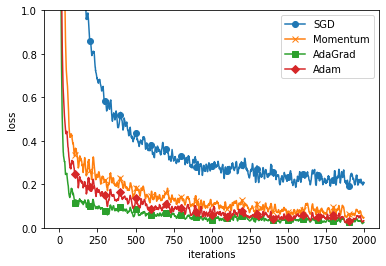

In [1]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()


## 6.2.2 隠れ層のアクティベーション分布

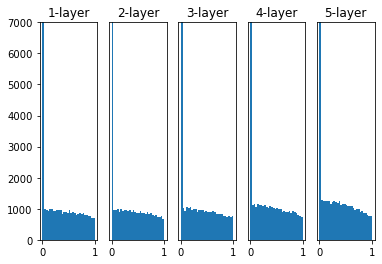

In [31]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100  # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    #w = np.random.randn(node_num, node_num) * 1
    #w = np.random.randn(node_num, node_num) * 0.01
    #w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    #z = sigmoid(a)
    z = ReLU(a)
    #z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    #plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()


## 6.2.4 MNISTデータセットによる重み初期値の比較

===========iteration:0===========
std=0.01:2.3024861672527877
Xavier:2.3130246897085476
He:2.3663100011210947
===========iteration:100===========
std=0.01:2.3017674567225073
Xavier:2.2666669617714796
He:1.5046926287586908
===========iteration:200===========
std=0.01:2.3022323352002516
Xavier:2.19237734358368
He:0.7266729002273893
===========iteration:300===========
std=0.01:2.3035285594205726
Xavier:2.0432890687389347
He:0.6137215336257927
===========iteration:400===========
std=0.01:2.3035020559411237
Xavier:1.6092962492887517
He:0.42818571672162864
===========iteration:500===========
std=0.01:2.3006634232371725
Xavier:1.123568557523297
He:0.5106259364013106
===========iteration:600===========
std=0.01:2.3002129788786365
Xavier:0.6548877184767872
He:0.27278212875154045
===========iteration:700===========
std=0.01:2.301165967509078
Xavier:0.6160106966423589
He:0.3044174172241374
===========iteration:800===========
std=0.01:2.3033314823941264
Xavier:0.5587150489120933
He:0.2798475666559

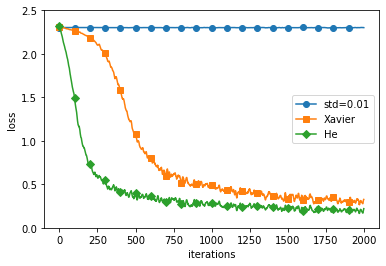

In [32]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()